In [1]:
from jupyterthemes import jtplot
jtplot.style()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
accidents = pd.read_csv('../data/accidents.csv')
casualties = pd.read_csv('../data/casualties.csv', on_bad_lines = 'skip')
vehicles = pd.read_csv('../data/vehicles.csv', on_bad_lines = 'skip')

In [4]:
accidents_vehicles = accidents.merge(vehicles, how='left', on='Accident_Index')

In [5]:
def transform_label(l):
    if 'Turning' in l:
        return 'Turning'
    elif 'Changing lane' in l:
        return 'Changing lane'
    elif 'Overtaking' in l:
        return 'Overtaking'
    elif 'Going ahead' in l:
        return 'Going ahead'
    return l
    

In [6]:
summary = accidents_vehicles.groupby('Vehicle_Manoeuvre', as_index=False).size()
summary = summary[list(map(lambda x: x not in [2, 3, 4, -1, 8, 10, 16, 17, 18], summary['Vehicle_Manoeuvre']))]
maneouvre_names = pd.read_csv('../data/context/Vehicle_Manoeuvre.csv')
summary = summary.merge(maneouvre_names, how='left', left_on='Vehicle_Manoeuvre', right_on='code'). \
    drop(columns=['Vehicle_Manoeuvre', 'code'])
summary = summary.assign(
    maneouvre = list(map(transform_label, summary.label))
).drop(columns=['label'])
summary = summary.groupby('maneouvre', as_index = False).sum('size')
summary = summary.sort_values('size')
summary

,maneouvre,size
5,U-turn,22394
3,Reversing,41089
0,Changing lane,56192
1,Moving off,113009
2,Overtaking,117561
4,Turning,385128


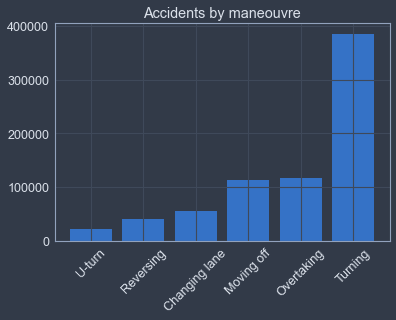

In [7]:
plot = plt.bar(x=summary['maneouvre'], height=summary['size'])
ax = plot[0].axes
plt.xticks(rotation=45)
ax.ticklabel_format(style='plain', axis='y')
plt.title('Accidents by maneouvre')
plt.savefig('../plots/accidents_by_maneouvre.jpeg')